In [1]:
import numpy as np
import pandas as pd
import os
import datetime

import matplotlib.pyplot as plt

plt.rc('font', family='serif')
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14, color='grey')
plt.rc('ytick', labelsize=14, color='grey')
plt.rc('legend', fontsize=16, loc='lower left')
plt.rc('figure', titlesize=18)
plt.rc('savefig', dpi=330, bbox='tight')
%matplotlib inline

In [2]:
from util import generate_fig_name

In [3]:
data_dir = '../data'
data_file = 'zone_temp_exterior_raw.csv'

path_to_data = os.path.join(data_dir, data_file)
data = pd.read_csv(path_to_data, index_col=0)

In [4]:
data.index = pd.to_datetime(data.index)
data.index = data.index.tz_convert("America/Los_Angeles")

data = data.resample('1T').mean()

In [5]:
data['date'] = data.index.date
data['time'] = data.index.time

In [6]:
# reshape the data, dataframe for each sensor, row for date, column for minute of the day

sensor_index = data.columns[0]

data_sensor = data[[sensor_index,'date','time']]
data_daily = data_sensor.pivot_table(index = 'date', 
                                     columns = 'time',
                                     values = sensor_index)

data_daily.dropna(inplace=True)

data_daily

time,00:00:00,00:01:00,00:02:00,00:03:00,00:04:00,00:05:00,00:06:00,00:07:00,00:08:00,00:09:00,...,23:50:00,23:51:00,23:52:00,23:53:00,23:54:00,23:55:00,23:56:00,23:57:00,23:58:00,23:59:00
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2
2018-01-26,71.4,71.4,71.4,71.3,71.3,71.3,71.3,71.3,71.3,71.3,...,70.0,70.0,70.0,69.9,69.9,69.9,69.9,69.9,69.9,69.9
2018-01-27,69.9,69.9,69.9,69.9,69.9,69.9,69.9,69.9,69.9,69.9,...,70.2,70.2,70.2,70.2,70.2,70.2,70.2,70.2,70.2,70.2
2018-01-28,70.2,70.2,70.2,70.2,70.2,70.2,70.2,70.1,70.1,70.1,...,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1
2018-01-29,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1,...,70.8,70.8,70.8,70.8,70.8,70.8,70.8,70.8,70.8,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,64.7,64.7,64.7,64.7,64.7,64.7,64.7,64.7,64.7,64.7,...,63.3,63.3,63.3,63.3,63.3,63.3,63.3,63.3,63.3,63.3
2020-12-27,63.3,63.3,63.3,63.3,63.3,63.3,63.3,63.3,63.3,63.3,...,63.5,63.5,63.5,63.5,63.5,63.5,63.5,63.5,63.4,63.4
2020-12-28,63.4,63.4,63.4,63.4,63.4,63.4,63.4,63.4,63.4,63.4,...,62.5,62.5,62.5,62.5,62.5,62.5,62.5,62.5,62.5,62.5


In [7]:
data_daily = data_daily[(data_daily.iloc[:,-1] - data_daily.iloc[:,0])**2 < 1]

data_daily

time,00:00:00,00:01:00,00:02:00,00:03:00,00:04:00,00:05:00,00:06:00,00:07:00,00:08:00,00:09:00,...,23:50:00,23:51:00,23:52:00,23:53:00,23:54:00,23:55:00,23:56:00,23:57:00,23:58:00,23:59:00
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2
2018-01-27,69.9,69.9,69.9,69.9,69.9,69.9,69.9,69.9,69.9,69.9,...,70.2,70.2,70.2,70.2,70.2,70.2,70.2,70.2,70.2,70.2
2018-01-28,70.2,70.2,70.2,70.2,70.2,70.2,70.2,70.1,70.1,70.1,...,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1
2018-01-29,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1,70.1,...,70.8,70.8,70.8,70.8,70.8,70.8,70.8,70.8,70.8,70.8
2018-01-30,70.8,70.8,70.8,70.8,70.8,70.8,70.8,70.8,70.8,70.8,...,71.5,71.5,71.5,71.5,71.5,71.5,71.5,71.5,71.5,71.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,64.3,64.3,64.3,64.3,64.3,64.3,64.3,64.3,64.3,64.3,...,64.7,64.7,64.7,64.7,64.7,64.7,64.7,64.7,64.7,64.7
2020-12-27,63.3,63.3,63.3,63.3,63.3,63.3,63.3,63.3,63.3,63.3,...,63.5,63.5,63.5,63.5,63.5,63.5,63.5,63.5,63.4,63.4
2020-12-28,63.4,63.4,63.4,63.4,63.4,63.4,63.4,63.4,63.4,63.4,...,62.5,62.5,62.5,62.5,62.5,62.5,62.5,62.5,62.5,62.5


In [8]:
# for each day, apply FFT

date_index = data_daily.index[0]
threshold = 0.999999

x = data_daily.loc[date_index].values

n = len(x) # points in high resolution signal
dt = 60 # unit: s
freq = 1/(dt*n) * np.arange(n)  # unit:Hz

# calculate PSD through FFT
xt = np.fft.fft(x) # Fourier transformed signal
PSD = xt * np.conj(xt) / n # Power spectral density

# FFT result is symmetric, only the first half of frequency is meaningful
freq = freq[:n//2]
PSD = PSD[:n//2]

# determine the max frequency 
PSD_cumsum = np.cumsum(PSD)
PSD_cumsum = PSD_cumsum/PSD_cumsum[-1]

freq_index = (PSD_cumsum<threshold).sum()
period = 1/freq[freq_index]/60  # unit: min

In [9]:
period

720.0

## Calculate the result

In [10]:
result = pd.DataFrame()

n = len(x) # points in high resolution signal
dt = 60 # unit: s
freq = 1/(dt*n) * np.arange(1, n+1)  # unit:Hz
# freq = freq[:n//2] # FFT result is symmetric, only the first half of frequency is meaningful

for sensor_index in data.columns[:-2]:  # exclude the column of date and time
    
    threshold = 0.999999
    
    # Reshape the data, dataframe for each sensor, row for date, column for minute of the day
    data_sensor = data[[sensor_index,'date','time']]
    data_daily = data_sensor.pivot_table(index = 'date', 
                                         columns = 'time',
                                         values = sensor_index)
    data_daily.dropna(inplace=True)
    data_daily = data_daily[(data_daily.iloc[:,-1] - data_daily.iloc[:,0])**2 < 1]  # The data needs to be periodical
    
    # for each day, apply FFT

    for date_index in data_daily.index:

        x = data_daily.loc[date_index].values

        # calculate PSD through FFT
        xt = np.fft.fft(x) # Fourier transformed signal
        PSD = xt * np.conj(xt) / n # Power spectral density

        # FFT result is symmetric, only the first half of frequency is meaningful
        PSD = PSD[:n//2]

        # determine the max frequency 
        PSD_cumsum = np.cumsum(PSD)
        PSD_cumsum = PSD_cumsum/PSD_cumsum[-1]

        freq_index = (PSD_cumsum<threshold).sum()
        period = 1/freq[freq_index]/60  # unit: min
        
        result.loc[date_index,sensor_index] = period

In [11]:
result_freq = pd.DataFrame()

n = len(x) # points in high resolution signal
dt = 60 # unit: s
freq = 1/(dt*n) * np.arange(1, n+1)  # unit:Hz
# freq = freq[:n//2] # FFT result is symmetric, only the first half of frequency is meaningful

for sensor_index in data.columns[:-2]:  # exclude the column of date and time
    
    threshold = 0.999999
    
    # Reshape the data, dataframe for each sensor, row for date, column for minute of the day
    data_sensor = data[[sensor_index,'date','time']]
    data_daily = data_sensor.pivot_table(index = 'date', 
                                         columns = 'time',
                                         values = sensor_index)
    data_daily.dropna(inplace=True)
    data_daily = data_daily[(data_daily.iloc[:,-1] - data_daily.iloc[:,0])**2 < 1]  # The data needs to be periodical
    
    # for each day, apply FFT

    for date_index in data_daily.index:

        x = data_daily.loc[date_index].values

        # calculate PSD through FFT
        xt = np.fft.fft(x) # Fourier transformed signal
        PSD = xt * np.conj(xt) / n # Power spectral density

        # FFT result is symmetric, only the first half of frequency is meaningful
        PSD = PSD[:n//2]

        # determine the max frequency 
        PSD_cumsum = np.cumsum(PSD)
        PSD_cumsum = PSD_cumsum/PSD_cumsum[-1]

        freq_index = (PSD_cumsum<threshold).sum()
        # period = 1/freq[freq_index]/60  # unit: min
        
        result_freq.loc[date_index,sensor_index] = freq_index

In [12]:
result = result.sort_index()

result

,zone_016_temp,zone_017_temp,zone_018_temp,zone_019_temp,zone_021_temp,zone_022_temp,zone_023_temp,zone_024_temp,zone_025_temp,zone_026_temp,...,zone_063_temp,zone_064_temp,zone_065_temp,zone_066_temp,zone_067_temp,zone_068_temp,zone_069_temp,zone_070_temp,zone_071_temp,zone_072_temp
2018-01-01,480.000000,480.0,480.0,NaN,480.000000,144.0,288.0,NaN,360.0,360.000000,...,720.0,480.0,480.000000,360.0,360.0,180.000000,360.0,360.0,180.000000,360.000000
2018-01-26,NaN,480.0,480.0,360.000000,480.000000,NaN,NaN,NaN,NaN,NaN,...,480.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-27,480.000000,480.0,720.0,NaN,360.000000,NaN,NaN,NaN,NaN,NaN,...,720.0,720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-28,360.000000,480.0,720.0,NaN,288.000000,NaN,NaN,NaN,NaN,NaN,...,720.0,288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-29,110.769231,720.0,240.0,360.000000,205.714286,NaN,NaN,NaN,NaN,NaN,...,360.0,480.0,288.000000,480.0,288.0,102.857143,480.0,480.0,480.000000,160.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,NaN,240.0,360.0,NaN,480.000000,360.0,360.0,205.714286,360.0,288.000000,...,720.0,480.0,480.000000,480.0,288.0,120.000000,240.0,240.0,62.608696,205.714286
2020-12-27,480.000000,360.0,480.0,30.638298,360.000000,120.0,288.0,180.000000,288.0,205.714286,...,720.0,360.0,480.000000,360.0,360.0,180.000000,288.0,288.0,160.000000,360.000000
2020-12-28,180.000000,NaN,144.0,20.000000,NaN,72.0,NaN,NaN,NaN,NaN,...,NaN,NaN,205.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,480.000000,480.0,480.0,19.726027,480.000000,288.0,288.0,180.000000,360.0,288.000000,...,720.0,720.0,288.000000,NaN,NaN,NaN,288.0,240.0,72.000000,160.000000


## Visualize the result

In [13]:
import matplotlib.ticker as mtick

In [14]:
len(result.columns)

50

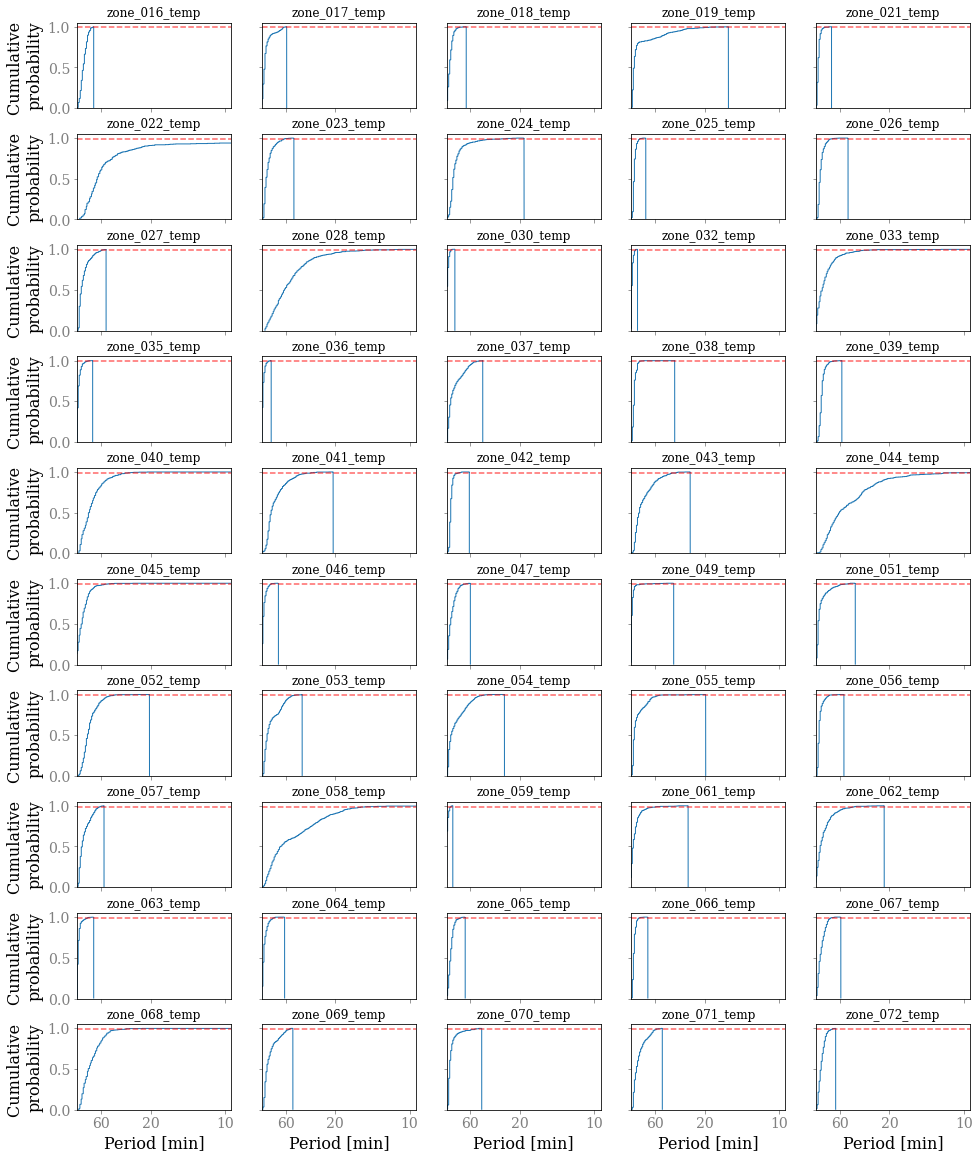

In [15]:
row_n = 10
col_n = 5

fig, axs = plt.subplots(row_n, col_n, figsize=(16, 20), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3)

for index, col in enumerate(result.columns):
    row_index = index//col_n
    col_index = index%col_n
    axs[row_index, col_index].hist(result_freq[col].values, bins=1000, density=True, cumulative=True, histtype='step')
    axs[row_index, col_index].axhline(0.99, alpha=0.6, ls='--', color='red')
    axs[row_index, col_index].title.set_text(col)

axs[0,0].set_xlim([1, 150])

xticks = np.array([24, 72, 144])
xticklabels = 1440/xticks

axs[0,0].set_xticks(xticks)
axs[0,0].set_xticklabels(xticklabels.astype('int'))

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
for row_index in range(row_n):
    axs[row_index,0].set_ylabel("Cumulative \nprobability")
    # axs[row_index,0].yaxis.set_major_formatter(xticks)
    
for col_index in range(col_n):
    axs[row_n-1, col_index].set_xlabel("Period [min]")

plt.savefig(generate_fig_name('cumulative_hist_all'))

In [16]:
highestFreq = result.quantile(q=0.01, axis=0).sort_values()

highestFreq.to_csv('highestFreq.csv')

In [17]:
highestFreq.index = [sensor_index.split('_')[1] for sensor_index in highestFreq.index]

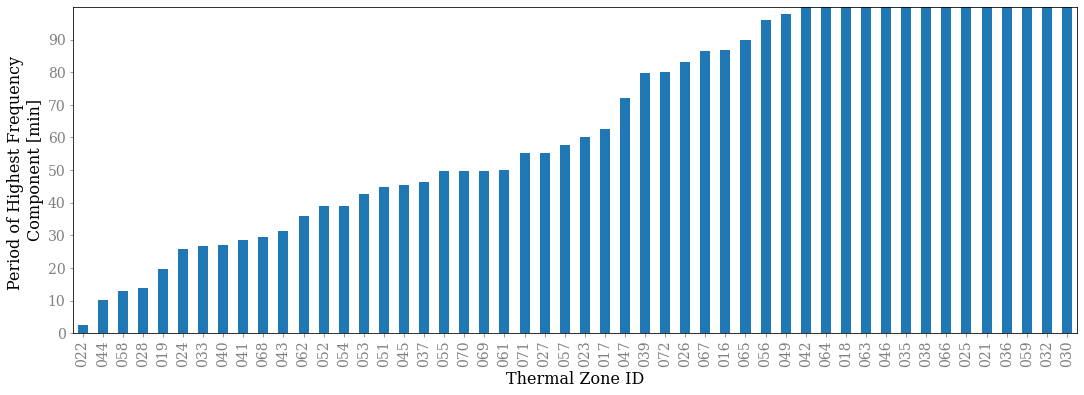

In [18]:
ax = highestFreq.plot(kind='bar', figsize=(18, 6))
plt.ylabel('Period of Highest Frequency \nComponent [min]')
plt.ylim([0,100])
plt.yticks(np.arange(0,100,10))
plt.xlabel('Thermal Zone ID')

plt.savefig(generate_fig_name('high_frequency_omponent'))